# DrawDowns

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\keipj\AppData\Local\Temp\ipykernel_7356\1852228712.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("02- portfolios_formed_on_ME_monthly_EW.csv", header=0, index_col=0, na_values=-99.99, parse_dates=True)


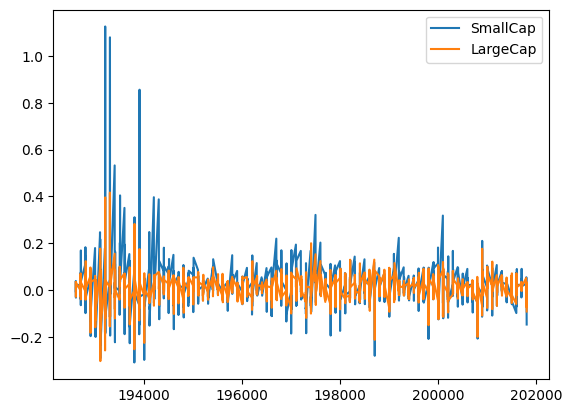

In [100]:
me_m = pd.read_csv("02- portfolios_formed_on_ME_monthly_EW.csv", header=0, index_col=0, na_values=-99.99, parse_dates=True)
rets = me_m[["Lo 20", "Hi 20"]]
rets.columns = ["SmallCap","LargeCap"]
rets /= 100
rets.plot.line()
plt.show()

In [101]:
rets.index = pd.to_datetime(rets.index,format= "%Y%m")

In [102]:
rets.index = rets.index.to_period("m")

In [103]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [104]:
# rets.loc['1975']
rets = rets['1999':'2015']
rets
n_month = rets.shape[0]
annual_returns = (rets+1).prod()**(12/n_month) - 1
annual_returns

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

In [105]:
annual_vol = rets.std() * np.sqrt(12)
annual_vol

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

In [106]:
rets.index

PeriodIndex(['1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06',
             '1999-07', '1999-08', '1999-09', '1999-10',
             ...
             '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
             '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]', length=204)

In [107]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 204 entries, 1999-01 to 2015-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  204 non-null    float64
 1   LargeCap  204 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


# Compute Drawdowns
1. Compute a wealth index
2. Compute previews peaks
3. Compute Drawdowns - which is the wealth values as a percentage of the previews peak

# Step 1

In [118]:
wealth_index = 1000 * (1+rets["LargeCap"]).cumprod()
wealth_index.head(10)

1999-01    1015.300000
1999-02     997.836840
1999-03    1034.557236
1999-04    1104.803672
1999-05    1099.500614
1999-06    1130.286632
1999-07    1088.013912
1999-08    1063.315996
1999-09    1020.996019
1999-10    1081.234784
Freq: M, Name: LargeCap, dtype: float64

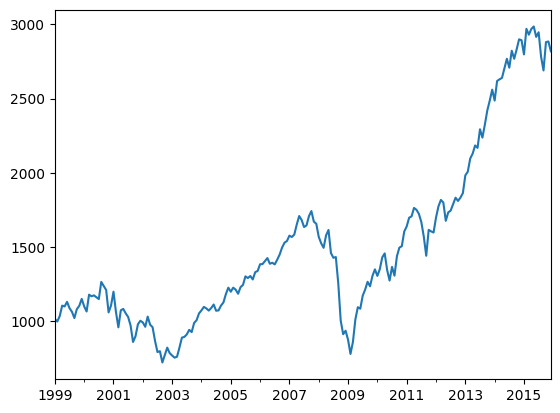

In [119]:
wealth_index.plot.line()
plt.show()

# Step 2

In [120]:
previous_peaks = wealth_index.cummax()

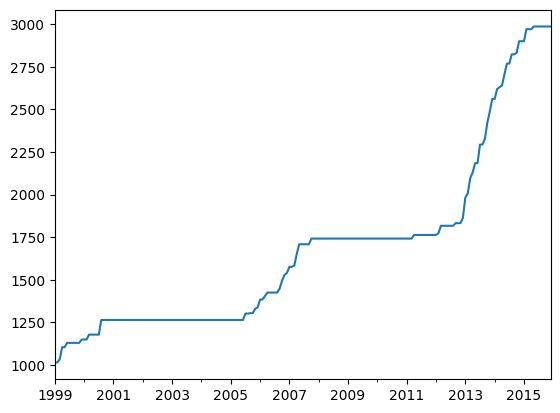

In [121]:
previous_peaks.plot()
plt.show()

# Step 3

<Axes: >

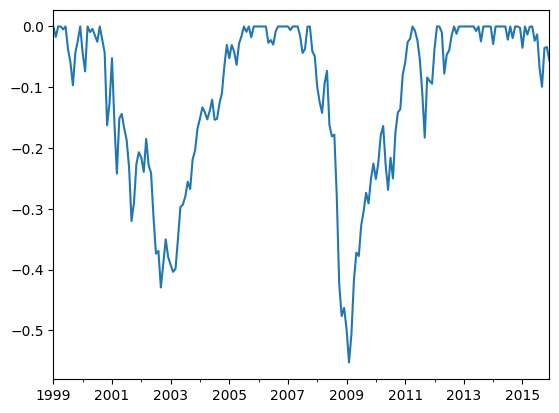

In [122]:
Drawdown = (wealth_index - previous_peaks) / previous_peaks
Drawdown.plot()

In [123]:
Drawdown.head()

1999-01    0.0000
1999-02   -0.0172
1999-03    0.0000
1999-04    0.0000
1999-05   -0.0048
Freq: M, Name: LargeCap, dtype: float64

In [124]:
Drawdown.min()

-0.5527349978713653

In [125]:
Drawdown['1999':'2016'].min()

-0.5527349978713653

In [126]:
Drawdown['1999':'2016'].idxmin()

Period('2009-02', 'M')

In [117]:
Drawdown.idxmin()

Period('2009-02', 'M')

# Next part -> Funcions

In [19]:
def Drawdown(return_series: pd.Series) -> pd.DataFrame:
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "wealth": wealth_index,
        "peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [20]:
Drawdown(rets['LargeCap']).head()

,wealth,peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [21]:
Drawdown(rets["LargeCap"])[["wealth", "peaks"]].head()

,wealth,peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


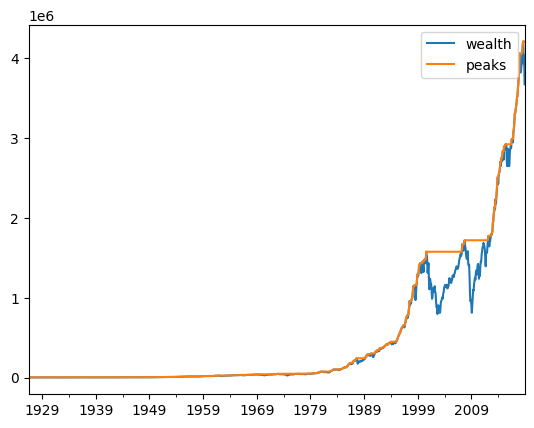

In [22]:
Drawdown(rets["LargeCap"])[["wealth", "peaks"]].plot()
plt.show()

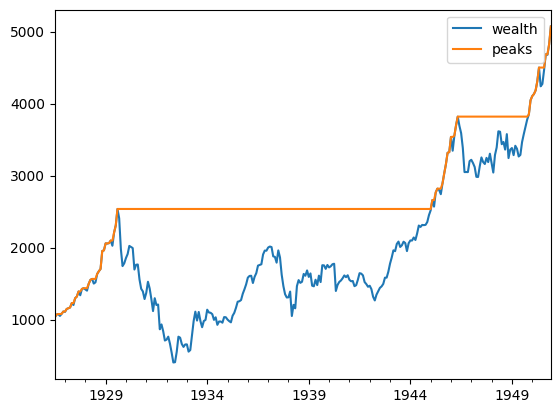

In [23]:
Drawdown(rets[:"1950"]["LargeCap"])[["wealth", "peaks"]].plot()
plt.show()

In [24]:
Drawdown(rets["LargeCap"])[["Drawdown"]].min()

Drawdown   -0.840038
dtype: float64

In [25]:
Drawdown(rets["SmallCap"])[["Drawdown"]].min()

Drawdown   -0.833001
dtype: float64

In [26]:
print(Drawdown(rets["SmallCap"])[["Drawdown"]].idxmin())
print(Drawdown(rets["LargeCap"])[["Drawdown"]].idxmin())

Drawdown    1932-05
dtype: period[M]
Drawdown    1932-05
dtype: period[M]
